In [1]:

# A1 - Neural Networks and Regression (Testing Implementations)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Import your three implementations
from NeuralNet import NeuralNet                   # BP-M (from scratch)
from neuralnet_torch import NeuralNetTorch        # BP-F (PyTorch)
from mlr_sklearn import MultipleLinearRegressionSK  # MLR-F (scikit-learn)

In [2]:
#Dataset Base

# XOR dataset (non-linear) for BP
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
Z_xor = np.array([[0],[1],[1],[0]], dtype=np.float32)

# Linear dataset - for Regression
X_lin = np.array([
    [1.0, 2.0],
    [2.0, 0.0],
    [3.0, 1.0],
    [4.0, 3.0],
    [5.0, 5.0],
], dtype=np.float64)

Z_lin = 2 * X_lin[:, 0] + 0.5 * X_lin[:, 1] + 1.0


In [3]:
# Load dataset from file 
hours = pd.read_csv('hours_encoded.csv')

# Remove cnt column, as we'll be using cnt_log for regression
hours = hours.drop(columns=["cnt"])

# Shuffle data as per instructions, and pick up only first 1500 samples
hours = hours.sample(n=1500, random_state=42).reset_index(drop=True)

X = hours.drop(columns=["cnt_log"])
y = hours["cnt_log"]

# split train / val / test as per instructions
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,
    y,
    test_size=0.20,      # 20% for test
    shuffle=True,        # not stricly necessary
    random_state=42
)

# Split trainval into train and val 
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    test_size=0.2,     
    shuffle=True,
    random_state=42
)

# (Optional) Check sizes
print("X_train:", X_train.shape)
print("X_val:  ", X_val.shape)
print("X_test: ", X_test.shape)
# test

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_xor = X_train_scaled
Z_xor = y_train.values

X_train: (960, 61)
X_val:   (240, 61)
X_test:  (300, 61)


In [14]:
# NOTE to Juan: this is a TEST

# Safe MAPE implementation (ignores zero targets)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100


def evaluate_regression_preds(y_train, y_train_pred, y_val, y_val_pred):
    # Metrics
    train_mse  = mean_squared_error(y_train, y_train_pred)
    val_mse    = mean_squared_error(y_val, y_val_pred)

    train_mae  = mean_absolute_error(y_train, y_train_pred)
    val_mae    = mean_absolute_error(y_val, y_val_pred)

    train_mape = mape(y_train, y_train_pred)
    val_mape   = mape(y_val, y_val_pred)

    # Pretty printing
    print("Evaluations:")
    print(f" - Train MSE:  {train_mse:.6f} | Train MAE:  {train_mae:.6f} | Train MAPE: {train_mape:.2f}%")
    print(f" -  Val  MSE:   {val_mse:.6f} |   Val MAE:  {val_mae:.6f} |   Val MAPE:   {val_mape:.2f}%")

Neural network has been initialized
Architecture (neurons per layer): [61, 35, 1]
Activation function used: sigmoid
 Layer 1: w(35, 61), theta(35, 1)
 Layer 2: w(1, 35), theta(1, 1)
Epoch 0: Train MSE=7.170162
Epoch 100: Train MSE=7.155404
Epoch 200: Train MSE=7.155398

Predictions BP-M (from scratch):


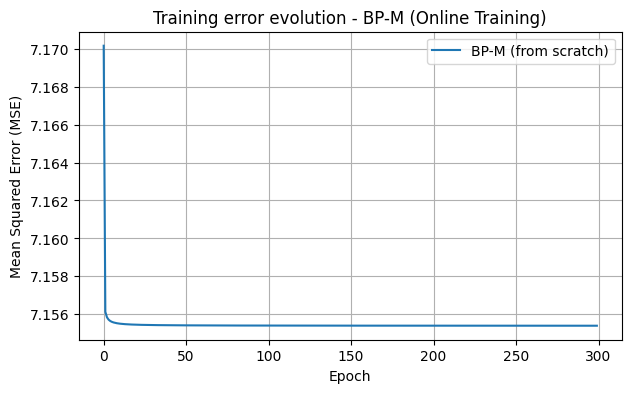

In [5]:

# Test 1: Neural Network - BP (from scratch)

# Create the manual neural network using the same parameters as in the assignment
net_manual = NeuralNet(
    [61, 35, 1],
    fact='sigmoid',
    eta=0.01,
    alpha=0.9,
    epochs=300,
    val_split=0.0
)

# Training phase (each pattern is processed individually - online mode)
net_manual.fit(X_xor, Z_xor)

# Retrieve training errors per epoch
train_err_manual, _ = net_manual.loss_epochs()


# Predictions

# Evaluate one sample at a time (online mode)
pred_manual = np.array([net_manual.predict(x) for x in X_xor])

print("\nPredictions BP-M (from scratch):")
#for i, (inp, pred) in enumerate(zip(X_xor, pred_manual)):
#    print(f"Input {inp} -> Predicted output: {pred.ravel()[0]:.4f}")


# Training error plot

plt.figure(figsize=(7, 4))
plt.plot(train_err_manual, label="BP-M (from scratch)", color="tab:blue")
plt.title("Training error evolution - BP-M (Online Training)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.legend()
plt.show()

Neural network (PyTorch) has been initialized
Architecture (neurons per layer): [61, 35, 1]
Activation function used: sigmoid
Epoch 0: Train MSE=17.610970
Epoch 100: Train MSE=1.976814
Epoch 200: Train MSE=1.976422
Epoch 300: Train MSE=1.976401
Epoch 400: Train MSE=1.976392
Epoch 500: Train MSE=1.976388
Epoch 600: Train MSE=1.976385
Epoch 700: Train MSE=1.976383
Epoch 800: Train MSE=1.976381
Epoch 900: Train MSE=1.976380
Evaluations:
 - Train MSE:  1.977354 | Train MAE:  1.150326 | Train MAPE: 39.49%
 -  Val  MSE:   1.983704 |   Val MAE:  1.194453 |   Val MAPE:   38.74%


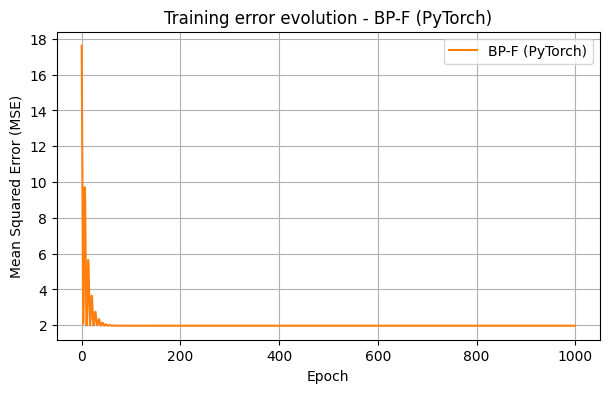

In [16]:
# Test 2: Neural Network - BP (PyTorch)

# Create the PyTorch neural network (same architecture and parameters)
net_torch = NeuralNetTorch(
    [61, 35, 1],
    fact='sigmoid',
    eta=0.01,
    alpha=0.9,
    epochs=1000,
    val_split=0.0
)

# Train the network
net_torch.fit(X_xor, Z_xor)

# Retrieve training errors
train_err_torch, _ = net_torch.loss_epochs()

# Predictions
pred_torch = net_torch.predict(X_val_scaled) #X_xor)

# Test for MSE, MAE, MAPE
y_train_pred = net_torch.predict(X_train_scaled)
y_val_pred   = net_torch.predict(X_val_scaled)
evaluate_regression_preds(y_train, y_train_pred, y_val, y_val_pred)

#print("\nPredictions BP-F (PyTorch):")
#for i, (inp, pred) in enumerate(zip(X_xor, pred_torch)):
#    print(f"Input {inp} -> Predicted output: {pred.ravel()[0]:.4f}")

# Training error plot

plt.figure(figsize=(7, 4))
plt.plot(train_err_torch, label="BP-F (PyTorch)", color="tab:orange")
plt.title("Training error evolution - BP-F (PyTorch)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.legend()
plt.show()

MLR (scikit-learn) fitted
 - Train MSE: 0.191914 | Train R^2: 0.903728
 -  Val  MSE: 0.298498 |  Val  R^2: 0.842514
Evaluations:
 - Train MSE:  0.213231 | Train MAE:  0.322275 | Train MAPE: 10.76%
 -  Val  MSE:   0.194731 |   Val MAE:  0.318843 |   Val MAPE:   10.28%

Learned coefficients:
Coef: [ 0.00498846 -0.01707101 -0.20797731  0.29497955  0.02283528 -0.028703
  0.11435359  0.57895774 -0.09926969 -0.00212128  0.04231039  0.05890518
 -0.0354836   0.0354836   0.01743921  0.0351012   0.02759127 -0.03024314
  0.01789354  0.01407029 -0.0310456   0.00091025 -0.03894374  0.00228013
  0.00828674 -0.0190446  -0.04636447 -0.19415214 -0.24498465 -0.42009493
 -0.40029942 -0.22012909 -0.01480492  0.01123547  0.07167339  0.12422838
  0.09822122  0.12856159  0.09778991  0.1154584   0.12281572  0.12250832
  0.11284625  0.08180552  0.08956595  0.10539917  0.09994256  0.10480696
  0.05032702  0.04365147  0.01427082 -0.01207167 -0.00829443 -0.02105137
 -0.00378779  0.02610528  0.00609929  0.04044804

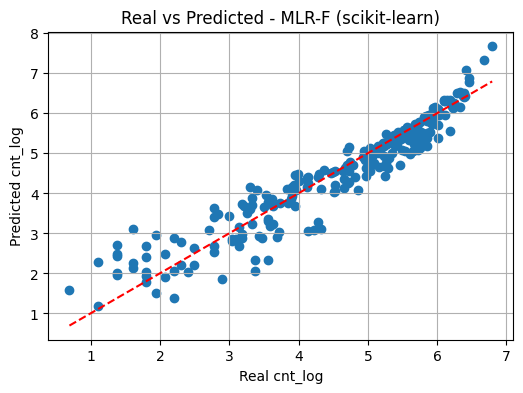

In [21]:

# Test 3: Multiple Linear Regression - MLR (scikit-learn)

# Create the regression model with 20% validation
mlr = MultipleLinearRegressionSK(val_split=0.2, scale=False)

# Train the model
mlr.fit(X_train_scaled, y_train)

# Test for MSE, MAE, MAPE
y_train_pred = mlr.predict(X_train_scaled)
y_val_pred   = mlr.predict(X_val_scaled)

evaluate_regression_preds(y_train, y_train_pred, y_val, y_val_pred)

# Predictions
# y_pred = mlr.predict(X_val_scaled) 

#print("\nPredictions MLR-F (scikit-learn):")
#for i, (inp, pred, real) in enumerate(zip(X_test.values, y_pred, y_test.values)):
#    print(f"Sample {i}: Predicted cnt_log = {pred:.4f}, Real cnt_log = {real:.4f}")

# Print learned coefficients
print("\nLearned coefficients:")
print("Coef:", mlr.coef_)
print("Intercept:", mlr.intercept_)

# Plot real vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_val, y_val_pred)
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()], "r--")
plt.title("Real vs Predicted - MLR-F (scikit-learn)")
plt.xlabel("Real cnt_log")
plt.ylabel("Predicted cnt_log")
plt.grid(True)
plt.show()

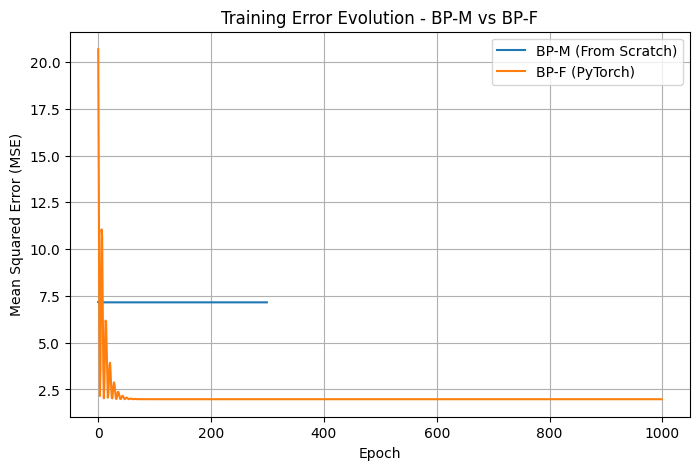

In [12]:

# Ccomparison between BP from Scratch and BP Pytorch


plt.figure(figsize=(8, 5))
plt.plot(train_err_manual, label="BP-M (From Scratch)", color="tab:blue")
plt.plot(train_err_torch, label="BP-F (PyTorch)", color="tab:orange")
plt.title("Training Error Evolution - BP-M vs BP-F")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()